In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
import os 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warning
os.getcwd()

'C:\\Users\\BAAC\\Desktop\\Jupyter\\Loan_Prediction'

In [2]:
train_data = pd.read_csv("../Loan_Prediction/train_data.csv")
test_data = pd.read_csv("../Loan_Prediction/test_data.csv")
sample_data = pd.read_csv("../Loan_Prediction/sample_submission.csv")

In [3]:
print("Train dataset: {}\nTest dataset: {}".format(train_data.shape, test_data.shape))

Train dataset: (614, 13)
Test dataset: (367, 12)


In [4]:
sns.__version__

'0.12.2'

In [5]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [7]:
# Prepare submission file for final submission.
submission = pd.DataFrame()
submission["Loan_ID"] = test_data["Loan_ID"]

In [8]:
# Dropping unnecessary column
train_data.drop(["Loan_ID"], axis = 1, inplace = True)
test_data.drop(["Loan_ID"], axis = 1, inplace = True)

In [9]:
train_data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
# Identify missing values in train and test datasets
print("TRAIN DATASET\n",train_data.isnull().sum())
print("\nTEST DATASET\n",test_data.isnull().sum())

TRAIN DATASET
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

TEST DATASET
 Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
# Set matplotlib style and lay-out
plt.style.use('fast')
plt.rcParams['figure.figsize']=[6,3]

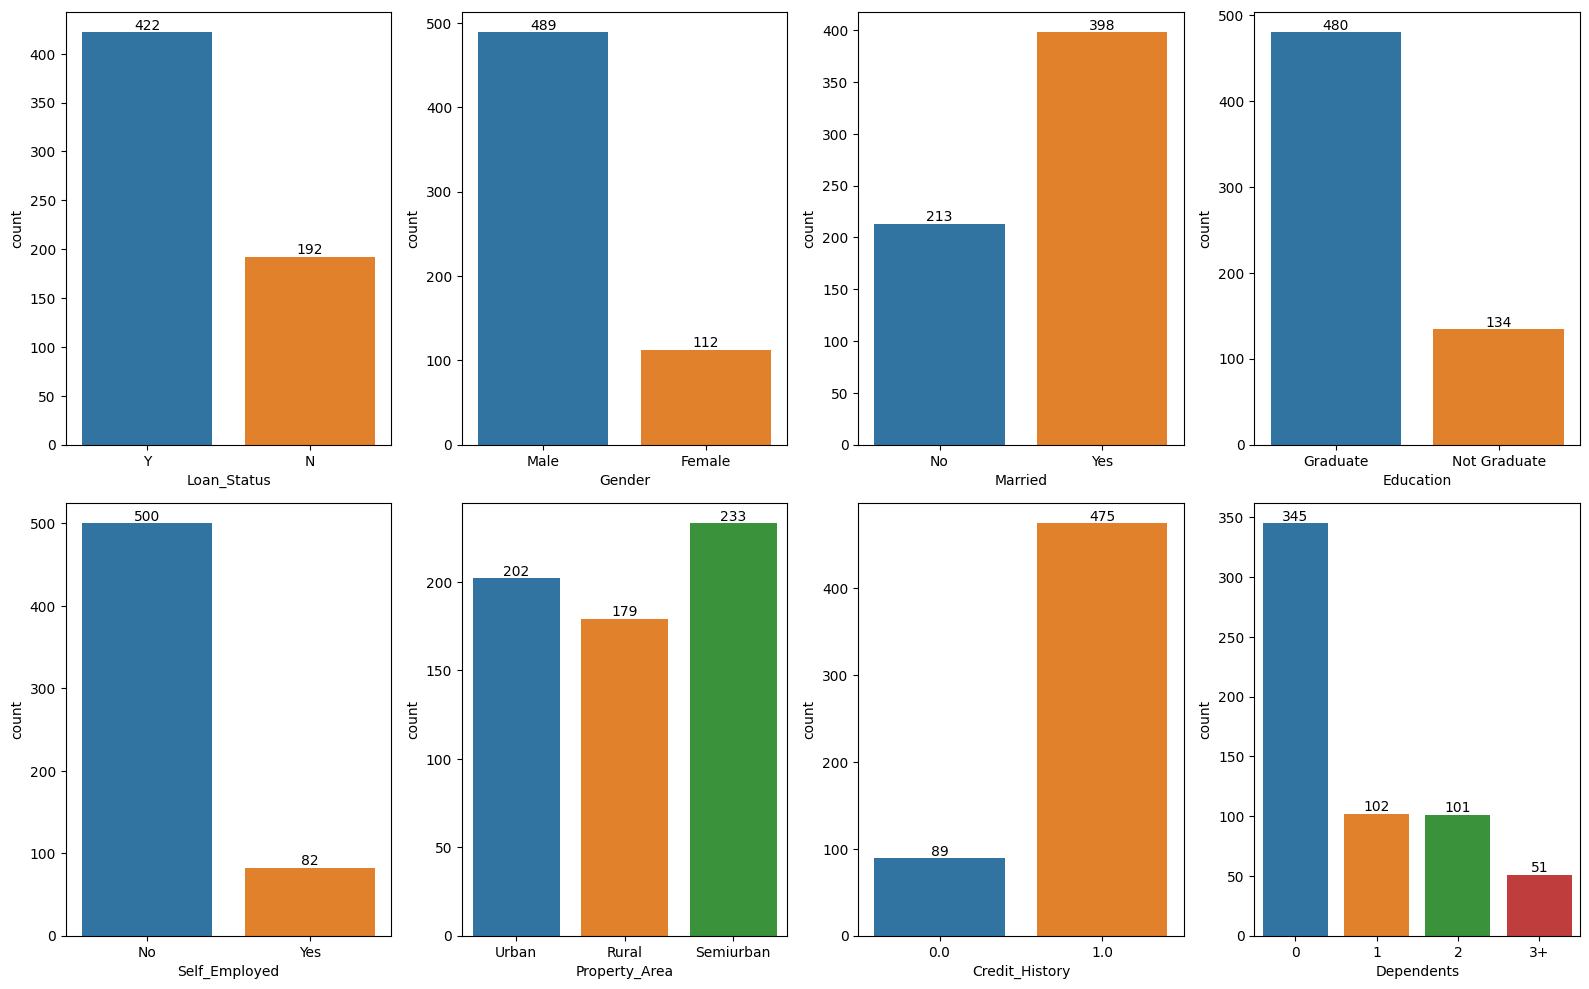

In [13]:
# Exploratpry Data Analysis (EDA)
fig,ax = plt.subplots(2,4,figsize=(16,10))
plots = [
    sns.countplot(x="Loan_Status", data=train_data, ax=ax[0, 0]),
    sns.countplot(x="Gender", data=train_data, ax=ax[0, 1]),
    sns.countplot(x="Married", data=train_data, ax=ax[0, 2]),
    sns.countplot(x="Education", data=train_data, ax=ax[0, 3]),
    sns.countplot(x="Self_Employed", data=train_data, ax=ax[1, 0]),
    sns.countplot(x="Property_Area", data=train_data, ax=ax[1, 1]),
    sns.countplot(x="Credit_History", data=train_data, ax=ax[1, 2]),
    sns.countplot(x="Dependents", data=train_data, ax=ax[1, 3])
]
for plot in plots:
    plot.bar_label(plot.containers[0])
plt.tight_layout()  # Adjust spacing to prevent overlapping labels
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

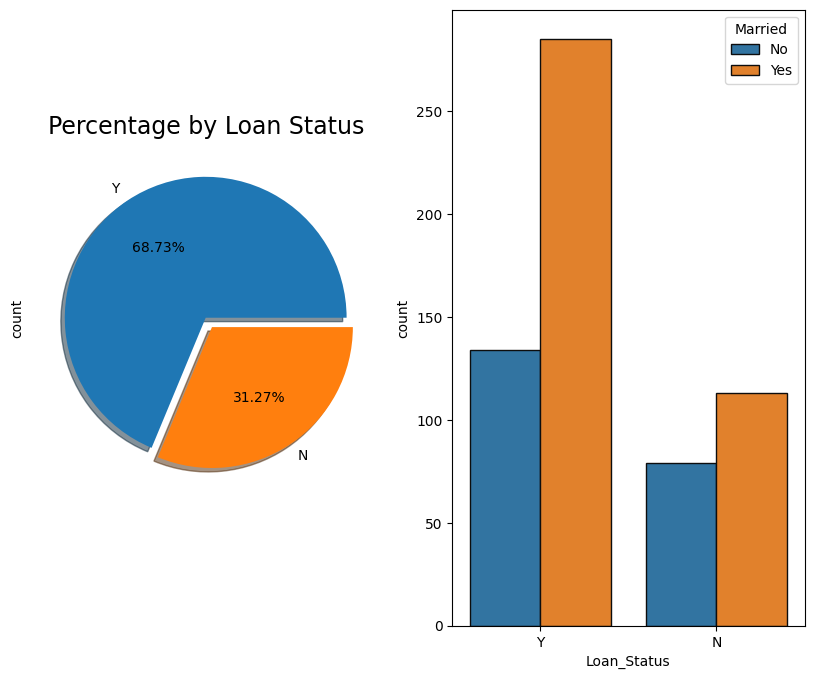

In [14]:
# Explore Variable "Married" with target variable "Loan_Status"
f,ax = plt.subplots(1,2,figsize=(10,8))
train_data["Loan_Status"].value_counts().plot.pie(ax=ax[0],autopct='%1.2f%%',explode=[0,0.08], shadow = True)
ax[0].set_title("Percentage by Loan Status", fontsize = 17)
sns.countplot(x="Loan_Status", hue = "Married", data=train_data, ax=ax[1],edgecolor="0.05")

#Catplot - 'Married' Vs 'Loan_Status' 
#sns.catplot(x='Married',y='Loan_Status',kind='point',data=train_data)

<Axes: xlabel='Education', ylabel='count'>

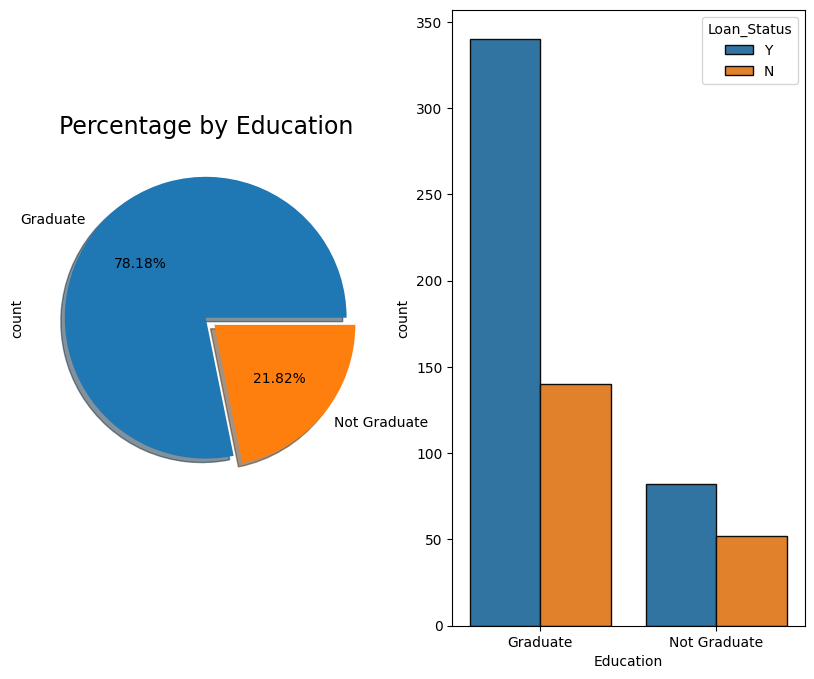

In [15]:
# Explore Variable "Education" with target variable "Loan_Status"
f,ax = plt.subplots(1,2,figsize=(10,8))
train_data["Education"].value_counts().plot.pie(ax=ax[0], autopct="%1.2f%%", explode=[0,0.08], shadow=True)
ax[0].set_title("Percentage by Education", fontsize=17)

sns.countplot(x="Education", hue="Loan_Status", data=train_data, ax=ax[1], edgecolor=".05")

#Catplot - 'Married' Vs 'Loan_Status' 
#sns.catplot(x='Education',y='Loan_Status',kind='point',data=train_data)

<Axes: xlabel='Property_Area', ylabel='count'>

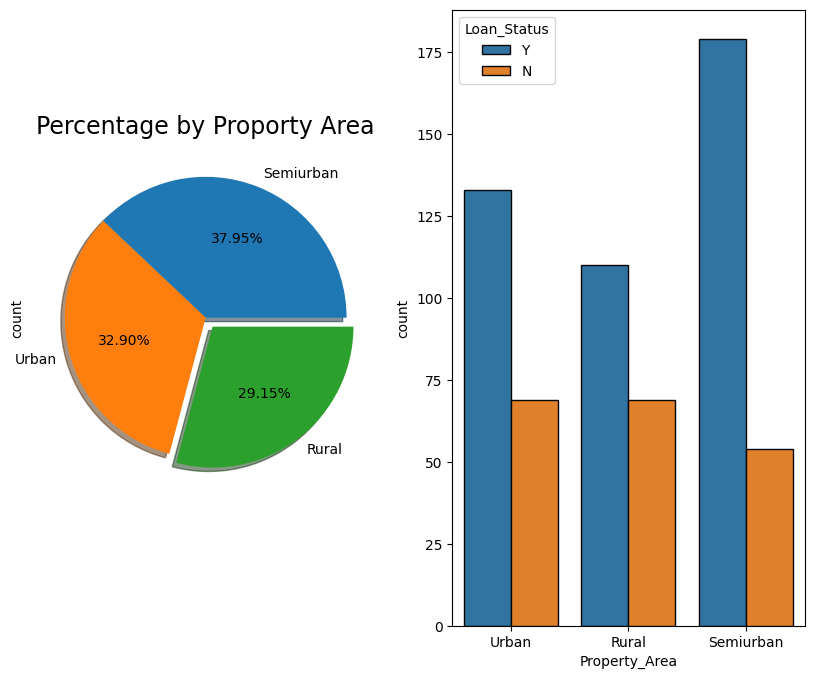

In [16]:
# Explore Variable "Property_Area" with target variable "Loan_Status"
f,ax = plt.subplots(1,2, figsize=(10,8))
train_data["Property_Area"].value_counts().plot.pie(ax=ax[0],explode=[0,0,0.08],shadow=True,autopct="%1.2f%%")
ax[0].set_title("Percentage by Proporty Area", fontsize = 17)
sns.countplot(x="Property_Area", hue = "Loan_Status", data=train_data, edgecolor = "0.02")

#Catplot - 'Property_Area' Vs 'Loan_Status'
#sns.catplot(x='Property_Area',y='Loan_Status',kind='bar',data=train_data)

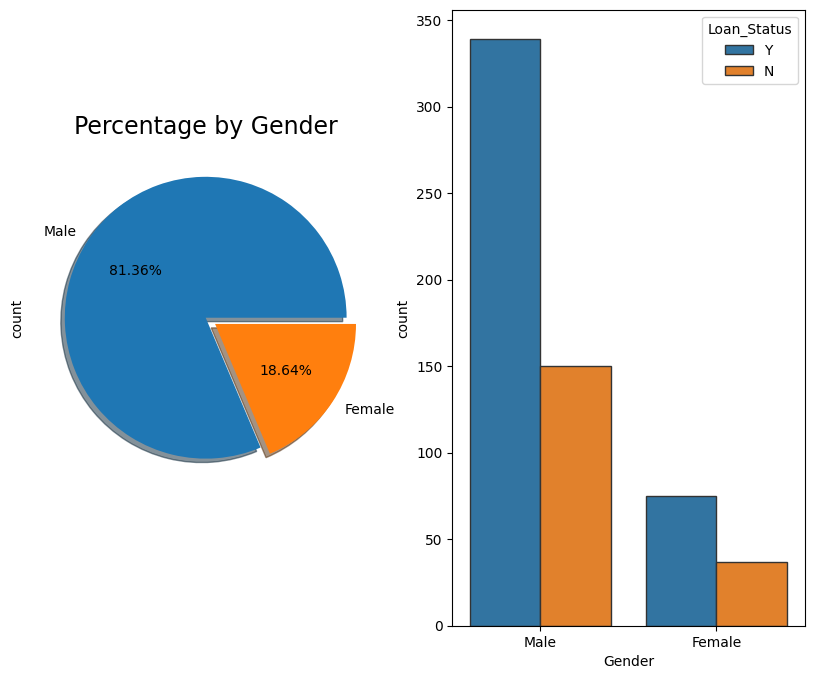

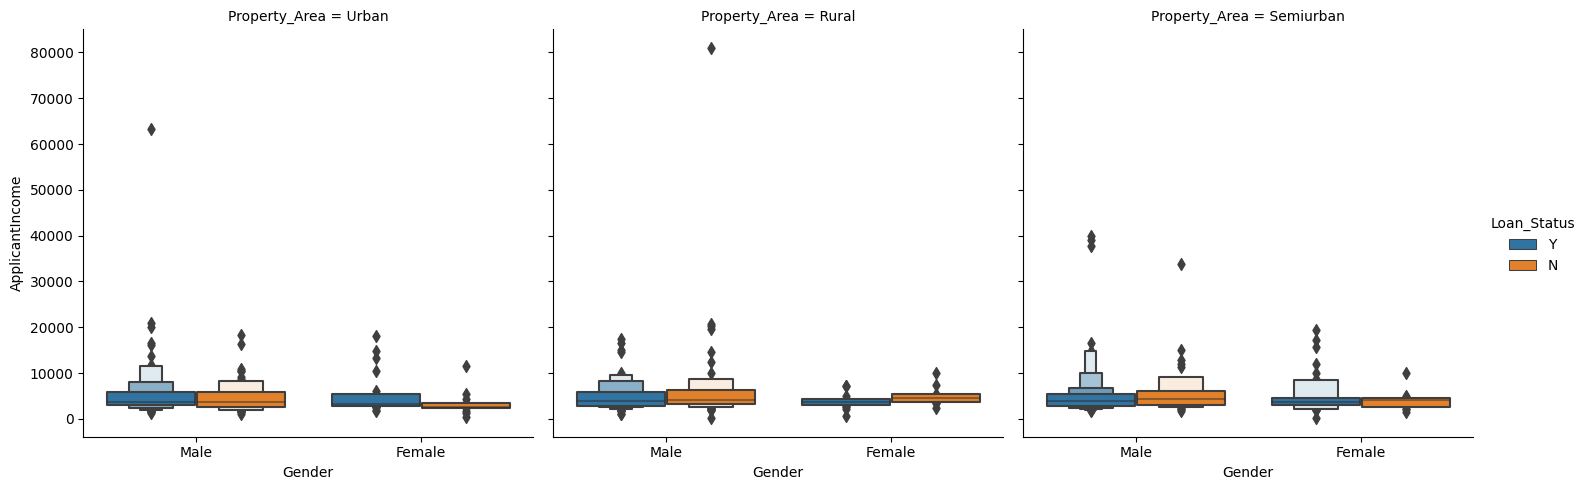

In [17]:
# Explore Variable "Property_Area" with target variable "Loan_Status"
f,ax = plt.subplots(1,2,figsize=(10,8))
train_data["Gender"].value_counts().plot.pie(ax=ax[0],explode=[0,0.08],shadow=True,autopct="%1.2f%%")
ax[0].set_title("Percentage by Gender",fontsize = 17)
sns.countplot(x="Gender", hue = "Loan_Status",  data=train_data, edgecolor="0.2")
sns.catplot(x='Gender',y='ApplicantIncome',data=train_data,kind='boxen',hue='Loan_Status', col='Property_Area')

<Axes: xlabel='Dependents', ylabel='count'>

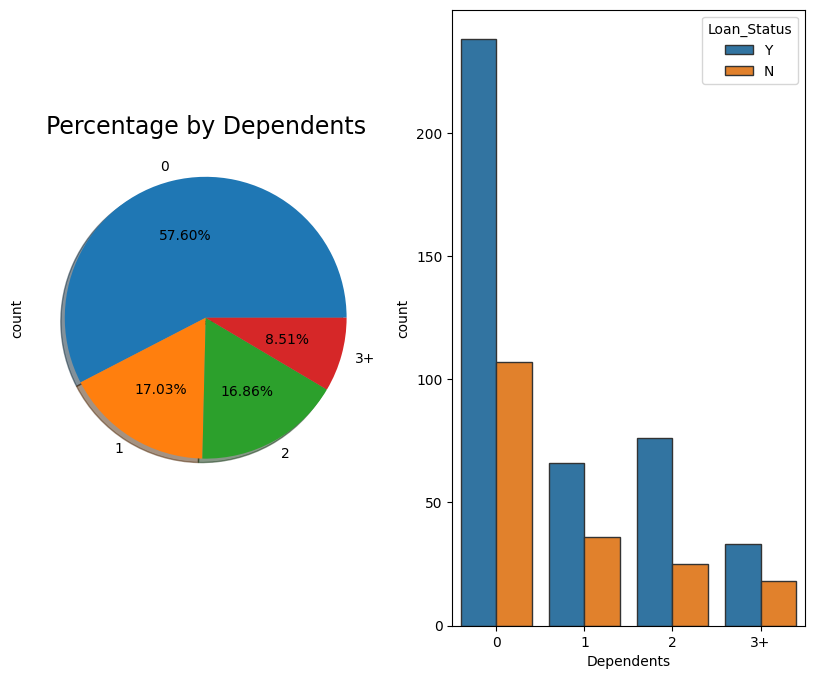

In [18]:
# Explore Variable "Dependents" with target variable "Loan_Status"
f,ax = plt.subplots(1,2,figsize=(10,8))
train_data["Dependents"].value_counts().plot.pie(ax=ax[0],shadow=True,autopct="%1.2f%%")
ax[0].set_title("Percentage by Dependents",fontsize = 17)
sns.countplot(x="Dependents", hue="Loan_Status", data=train_data, edgecolor="0.2")

<Axes: xlabel='Credit_History', ylabel='count'>

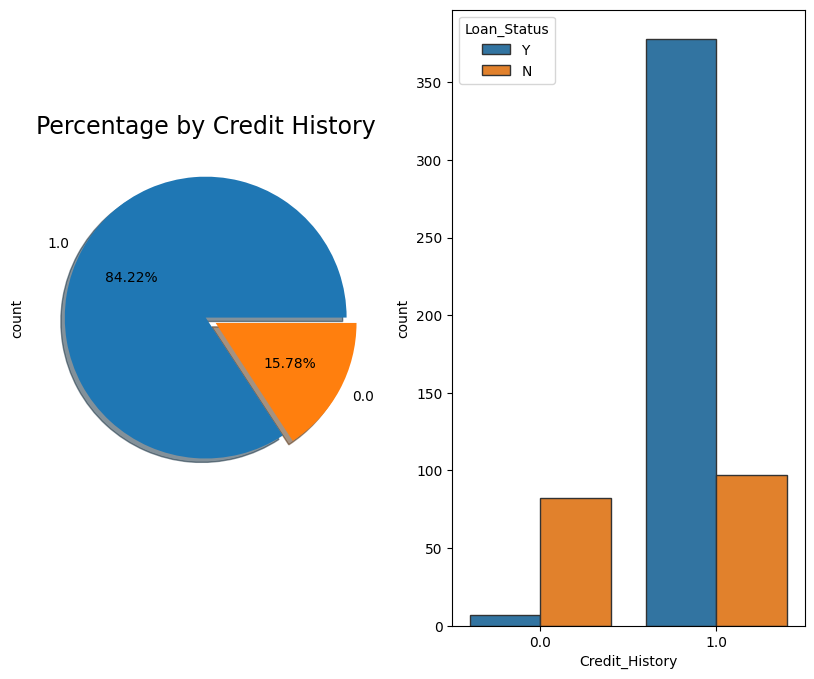

In [19]:
# Explore Variable "Credit_History" with target variable "Loan_Status"
f,ax = plt.subplots(1,2,figsize=(10,8))
train_data["Credit_History"].value_counts().plot.pie(ax=ax[0],autopct="%1.2f%%", shadow=True,explode=[0,0.08])
ax[0].set_title("Percentage by Credit History", fontsize = 17)
sns.countplot(x="Credit_History", hue="Loan_Status", data=train_data, edgecolor="0.2")

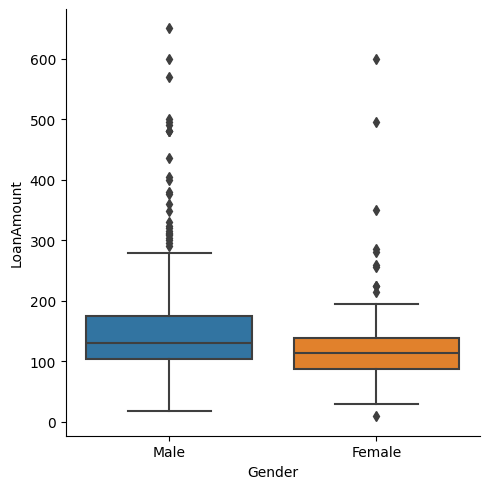

In [20]:
# Variable - 'Gender' Vs 'LoanAmount'
sns.catplot(x='Gender',y='LoanAmount',data=train_data,kind='box')

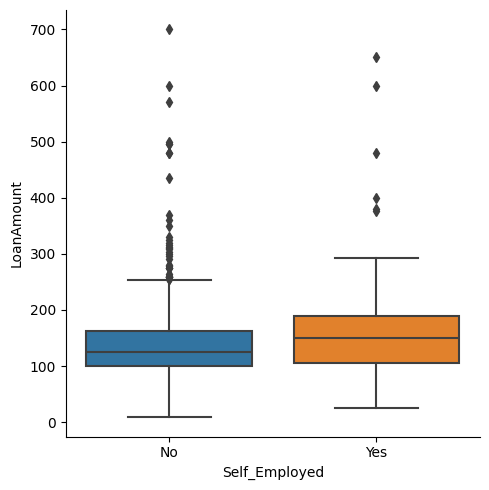

In [21]:
# Variable - 'Self_Employed' Vs 'LoanAmount'
sns.catplot(x='Self_Employed',y='LoanAmount',data=train_data,kind='box')

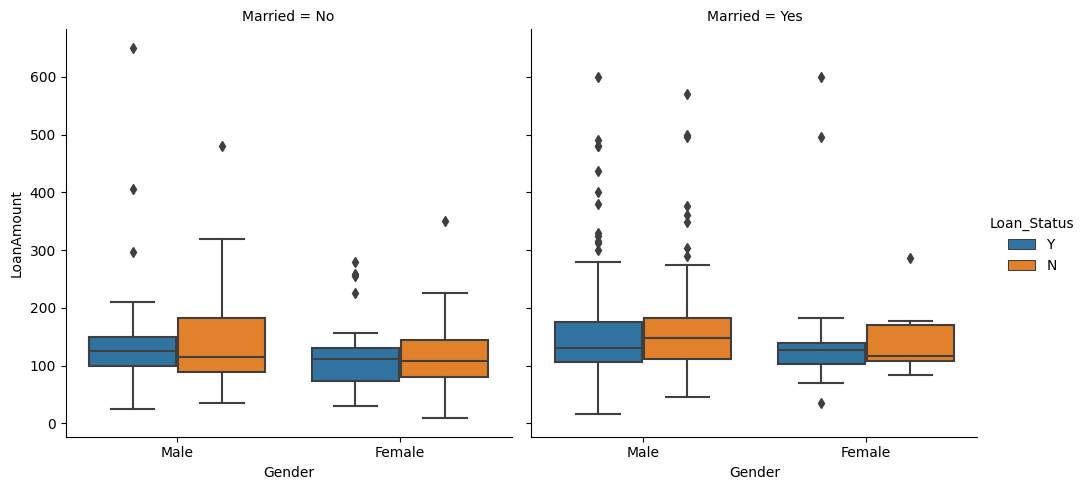

In [22]:
# Variable - 'Gender' Vs 'LoanAmount', hue='Loan_Status', col='Married'
sns.catplot(x='Gender',y='LoanAmount',data=train_data,kind='box',hue='Loan_Status', col='Married')

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

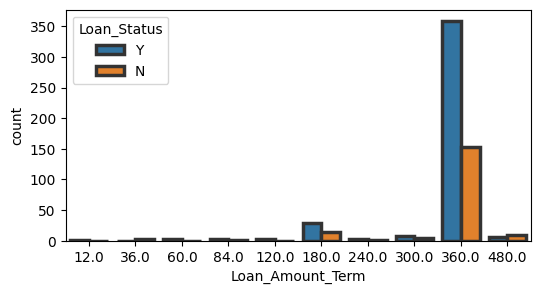

In [23]:
# Variable - 'Loan_Amount_Term' Vs 'Loan_Status'
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=train_data)

In [24]:
# mapping data to numerical
train_data["Loan_Status"] = train_data["Loan_Status"].map({"N":0, "Y":1})

In [25]:
# Column - Married. Fill Null values with mode of Married column
train_data["Married"].fillna(train_data["Married"].value_counts().index[0], inplace=True)
test_data["Married"].fillna(test_data["Married"].value_counts().index[0], inplace=True)

In [26]:
# Fill Column dependent
# If loan status is 1 then, dependent = 2 else dependent=1
train_data.loc[(train_data.Dependents.isnull())&(train_data.Loan_Status==1),'Dependents'] = '2'
train_data.loc[(train_data.Dependents.isnull()),'Dependents'] = '1'

In [27]:
# If Credit_History is 1 then, dependent = 2 else dependent=1 for test
test_data.loc[(test_data.Dependents.isnull())&(test_data.Credit_History==1),'Dependents'] = '2'
test_data.loc[(test_data.Dependents.isnull()),'Dependents'] = '1'

In [28]:
# Fill Column Credit_History
# If loan status is 1 then, Credit_History = 1 else Credit_History=0
train_data.loc[(train_data.Credit_History.isnull())&(train_data.Loan_Status==1),'Credit_History'] = 1
train_data.loc[(train_data.Credit_History.isnull()),'Credit_History'] = 0

# Fill Null values with mode of Credit_History column for test
test_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733, it was decided to impute credit history as 0 based upon the Income to loan ratio 
test_data.loc[(train_data.ApplicantIncome == 2733),'Credit_History']  = 0

In [29]:
# Fill Null values with mode of Gender column
train_data['Gender'].fillna(train_data['Gender'].value_counts().index[0], inplace=True)

test_data['Gender'].fillna(test_data['Gender'].value_counts().index[0], inplace=True)

In [30]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes
train_data.loc[(train_data.Self_Employed.isnull())&(train_data.Credit_History==1),'Self_Employed'] ='No'
train_data.loc[(train_data.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test_data.loc[(test_data.Self_Employed.isnull())&(test_data.Credit_History==1),'Self_Employed'] ='No'
test_data.loc[(test_data.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [31]:
# Fill Gender Column
# Fill Null values with mode of Gender column
train_data['Gender'].fillna(train_data['Gender'].value_counts().index[0], inplace=True)

test_data['Gender'].fillna(test_data['Gender'].value_counts().index[0], inplace=True)

In [32]:
# Fill Self_Employed Column
# If Credit_History is 1 then, impute Self_Employed = No else Yes
train_data.loc[(train_data.Self_Employed.isnull())&(train_data.Credit_History==1),'Self_Employed'] ='No'
train_data.loc[(train_data.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test_data.loc[(test_data.Self_Employed.isnull())&(test_data.Credit_History==1),'Self_Employed'] ='No'
test_data.loc[(test_data.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [33]:
# get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train_data["Loan_Amount_Term"][train_data["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train_data["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train_data["Loan_Amount_Term"][((train_data['Gender'] == train_data.iloc[i]["Gender"]) & (train_data['Married'] == train_data.iloc[i]["Married"]) & (train_data['Education'] == train_data.iloc[i]["Education"]) & (train_data['Self_Employed'] == train_data.iloc[i]["Self_Employed"]) & (train_data['Dependents'] == train_data.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train_data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
       train_data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

In [34]:
#Impute Loan term amount for test
index_NaN_Loan_Amount_Term_test = list(test_data["Loan_Amount_Term"][test_data["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = train_data["Loan_Amount_Term"].median() 
    Loan_Amount_Term_pred = test_data["Loan_Amount_Term"][((test_data['Gender'] == test_data.iloc[i]["Gender"]) & (test_data['Married'] == test_data.iloc[i]["Married"]) & (test_data['Education'] == test_data.iloc[i]["Education"]) & (test_data['Self_Employed'] == test_data.iloc[i]["Self_Employed"]) & (test_data['Dependents'] == test_data.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test_data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test_data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

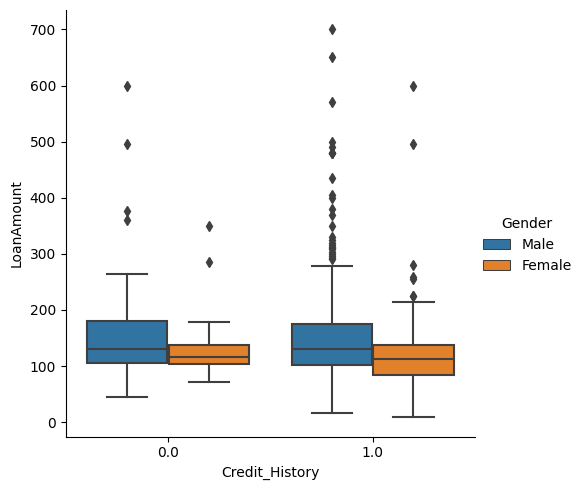

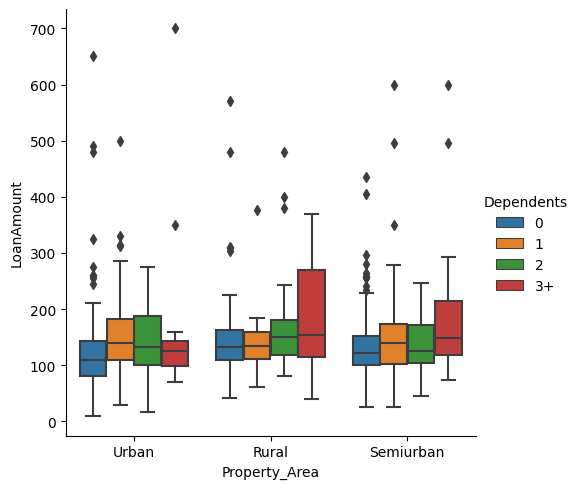

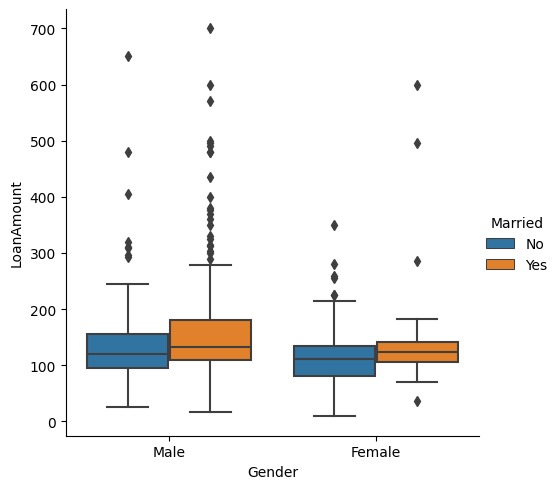

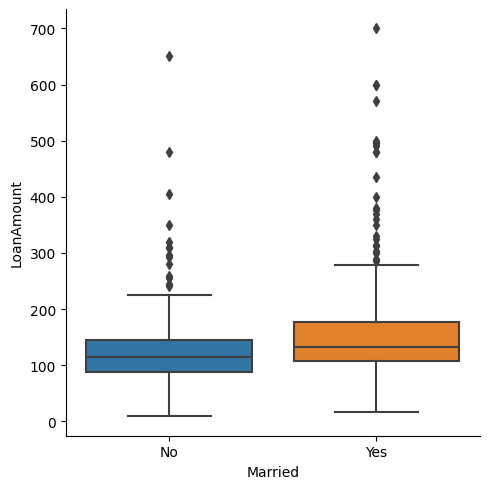

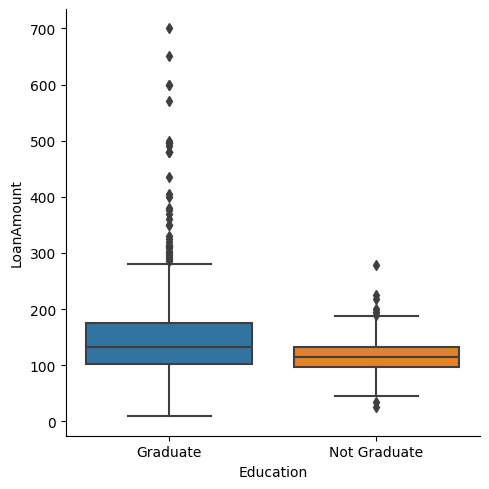

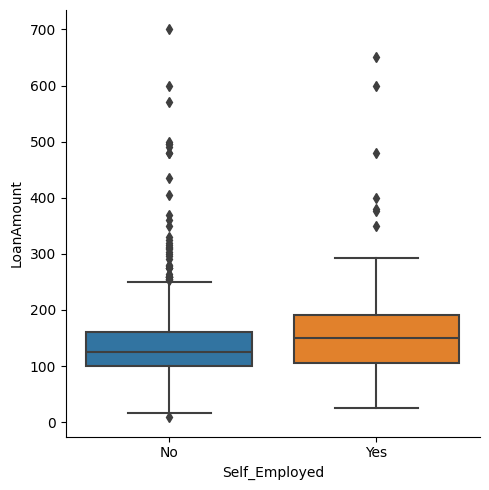

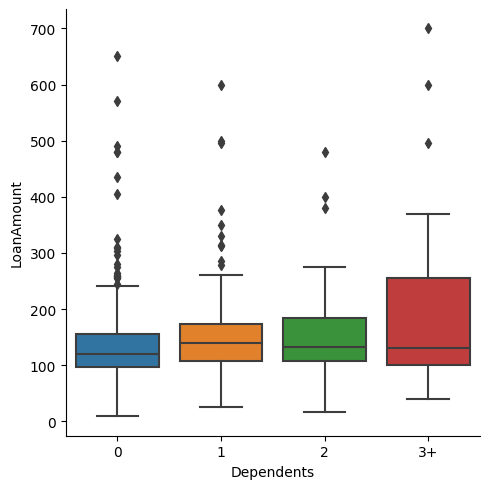

In [35]:

# Variable - LoanAmount - Identify on which other columns LoanAmount depends
# Explore LoanAmount vs categorical variables
g = sns.catplot(y="LoanAmount",x="Credit_History",data=train_data,kind="box",hue="Gender")
g = sns.catplot(y="LoanAmount",x="Property_Area",data=train_data,kind="box", hue="Dependents")
g = sns.catplot(y="LoanAmount",x="Gender", data=train_data,kind="box",hue="Married")
g = sns.catplot(y="LoanAmount",x="Married", data=train_data,kind="box")
g = sns.catplot(y="LoanAmount",x="Education", data=train_data,kind="box")
g = sns.catplot(y="LoanAmount",x="Self_Employed", data=train_data,kind="box")
g = sns.catplot(y="LoanAmount",x="Dependents", data=train_data,kind="box")

In [36]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(train_data["LoanAmount"][train_data["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train_data["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = train_data["LoanAmount"][((train_data['Property_Area'] == train_data.iloc[i]["Property_Area"]) & (train_data['Gender'] == train_data.iloc[i]["Gender"]) & (train_data['Married'] == train_data.iloc[i]["Married"]) & (train_data['Education'] == train_data.iloc[i]["Education"]) & (train_data['Self_Employed'] == train_data.iloc[i]["Self_Employed"]) & (train_data['Dependents'] == train_data.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train_data['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train_data['LoanAmount'].iloc[i] = LoanAmount_med

In [37]:
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test_data["LoanAmount"][test_data["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test_data["LoanAmount"].median()
    LoanAmount_pred = test_data["LoanAmount"][((test_data['Property_Area'] == test_data.iloc[i]["Property_Area"]) & (test_data['Gender'] == test_data.iloc[i]["Gender"]) & (test_data['Married'] == test_data.iloc[i]["Married"]) & (test_data['Education'] == test_data.iloc[i]["Education"]) & (test_data['Self_Employed'] == test_data.iloc[i]["Self_Employed"]) & (test_data['Dependents'] == test_data.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test_data['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test_data['LoanAmount'].iloc[i] = LoanAmount_med

In [38]:
# Identify missing values in train and test datasets
print("TRAIN DATASET\n",train_data.isnull().sum())
print("\nTEST DATASET\n",test_data.isnull().sum())

TRAIN DATASET
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

TEST DATASET
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [40]:
train_data["Dependents"] = train_data["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})
train_data["Property_Area"] = train_data["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})
test_data["Dependents"] = test_data["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})
test_data["Property_Area"] = test_data["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [41]:
# Since LoanAmount is in thousands, lets multiply LoanAmount column with 1000
train_data['LoanAmount'] = train_data['LoanAmount'] * 1000
test_data['LoanAmount'] = test_data['LoanAmount'] * 1000

In [42]:
numerical_cols = train_data.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
corr_matrix.style.background_gradient(cmap="BuPu")

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,1.000000,0.117988,0.023094,0.153898,-0.097020,-0.052240,0.014265,0.015294
ApplicantIncome,0.117988,1.000000,-0.116605,0.566572,-0.046222,-0.010051,-0.009500,-0.004710
CoapplicantIncome,0.023094,-0.116605,1.000000,0.188371,-0.058064,-0.054737,0.010522,-0.059187
LoanAmount,0.153898,0.566572,0.188371,1.000000,0.042522,-0.027182,-0.052333,-0.032651
Loan_Amount_Term,-0.097020,-0.046222,-0.058064,0.042522,1.000000,-0.008766,-0.078829,-0.024062
Credit_History,-0.052240,-0.010051,-0.054737,-0.027182,-0.008766,1.000000,0.004565,0.595642
Property_Area,0.014265,-0.009500,0.010522,-0.052333,-0.078829,0.004565,1.000000,0.032112
Loan_Status,0.015294,-0.004710,-0.059187,-0.032651,-0.024062,0.595642,0.032112,1.000000


In [43]:
#Combine train and test datasets
df=pd.concat([train_data,test_data], ignore_index=True)
df.shape

(981, 12)

In [44]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,105000.0,360.0,1.0,2,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,0,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,2,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,2,1.0
4,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,2,1.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,2,1.0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360.0,1.0,2,1.0
7,Male,Yes,3,Graduate,No,3036,2504.0,158000.0,360.0,0.0,1,0.0
8,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360.0,1.0,2,1.0
9,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360.0,1.0,1,0.0


In [45]:
# Let's add new feature

In [46]:
# Add total income
df["total_income"] = df["ApplicantIncome"]+df["CoapplicantIncome"]
#Dropping unwanted columns - 'ApplicantIncome','CoapplicantIncome'
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [47]:
# Categorical variables wise sum of numerical columns
df['Credit_History_Income_Sum']=df.groupby(['Credit_History'])['total_income'].transform('sum')
df['Dependents_LoanAmount_Sum']=df.groupby(['Dependents'])['LoanAmount'].transform('sum')

In [48]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,Credit_History_Income_Sum,Dependents_LoanAmount_Sum
0,Male,No,0,Graduate,No,105000.0,360.0,1.0,2,1.0,5849.0,5.554148e+06,72780000.0
1,Male,Yes,1,Graduate,No,128000.0,360.0,1.0,0,0.0,6091.0,5.554148e+06,24891000.0
2,Male,Yes,0,Graduate,Yes,66000.0,360.0,1.0,2,1.0,3000.0,5.554148e+06,72780000.0
3,Male,Yes,0,Not Graduate,No,120000.0,360.0,1.0,2,1.0,4941.0,5.554148e+06,72780000.0
4,Male,No,0,Graduate,No,141000.0,360.0,1.0,2,1.0,6000.0,5.554148e+06,72780000.0


In [49]:
# Assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833
r = 0.00833
df['EMI']=df.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)
df['Dependents_EMI_mean']=df.groupby(['Dependents'])['EMI'].transform('mean')

In [50]:
# LoanAmount_per_Total_Income
df['LoanAmount_per_Total_Income']=df['LoanAmount']/df['total_income']
# Loan_Amount_Term_per_Total_Income
df['Loan_Amount_Term_per_Total_Income']=df['Loan_Amount_Term']/df['total_income']

In [51]:
# EMI_per_Loan_Amount_Term
df['EMI_per_Loan_Amount_Term']=df['EMI']/df['Loan_Amount_Term']
# EMI_per_LoanAmount
df['EMI_per_LoanAmount']=df['EMI']/df['LoanAmount']

In [52]:
# Categorical variables wise mean of LoanAmount_per_Total_Income
df['Property_Area_LoanAmount_per_Total_Income_mean']=df.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')

In [53]:
################################# Bin formation ###############################################
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(df['total_income'].values.reshape(-1,1)).astype(float)

LoanAmount_per_Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(df['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)

In [54]:
print("combined dataset shape: {}".format(df.shape))

combined dataset shape: (981, 23)


In [55]:
#Drop unwanted columns
df=df.drop(['EMI'],axis=1)
df=df.drop(['total_income'],axis=1)
df=df.drop(['LoanAmount_per_Total_Income'],axis=1)

In [56]:
print("combined dataset dataset shape: {}".format(df.shape))

combined dataset dataset shape: (981, 20)


In [57]:
#Segregate train and test
train_df=df[df['Loan_Status'].isnull()==False]
test_df=df[df['Loan_Status'].isnull()==True]

In [58]:
#Label encode categorical variables using get_dummies()
train_df = pd.get_dummies(train_df, drop_first = True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [59]:
#Drop target variable from X and copy to y
X=train_df.drop(['Loan_Status'],axis=1)
y=train_df['Loan_Status']

#Drop target column (which is blank) from test dataset
X_main_test=test_df.drop(['Loan_Status'],axis=1)

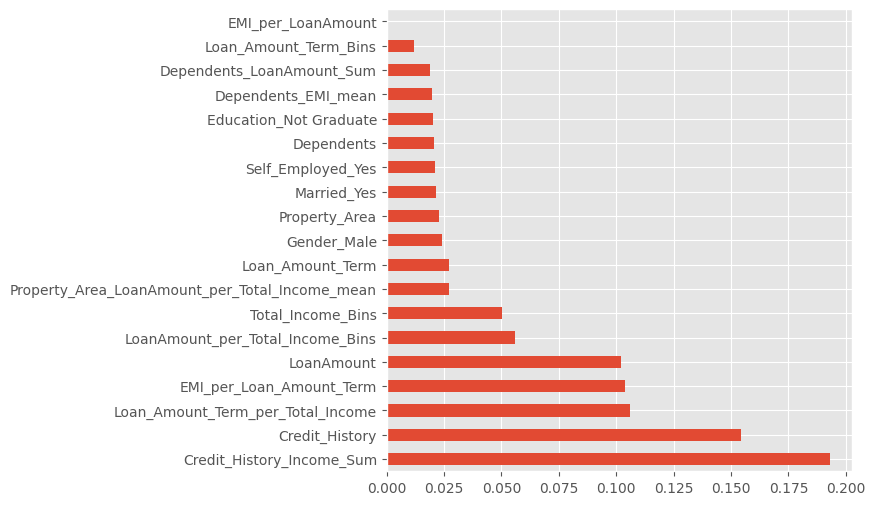

In [60]:
##### Check feature Importance #########
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [61]:
# Credit_History and Credit_History_Income_Sum are the two most important features

In [102]:
#Train-test split (85:15)
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (491, 19), 
Test dataset shape: (123, 19)


In [103]:
### Standard scaling using StandardScaler ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_main_test_sc =  sc.transform(X_main_test)

In [104]:
# Load classifiers and accurcy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)

# Predict on test set
pred_y_lr = clf_0.predict(X_test)

# How's the accuracy?
print("Accuracy = {:.2f}".format(accuracy_score(pred_y_lr, y_test) * 100))

Accuracy = 81.30


In [108]:
# Load classifiers and accurcy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)

# Predict on test set
pred_y_lr = clf_0.predict(X_test)

# How's the accuracy?
print("Accuracy = {:.2f}".format(accuracy_score(pred_y_lr, y_test) * 100))

Accuracy = 81.30


Text(162.72222222222223, 0.5, 'Predicted')

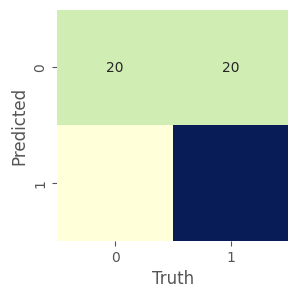

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,pred_y_lr) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [110]:
#Predict on actual test dataset for final prediction
pred_test = clf_0.predict(X_main_test_sc)

#If the predict value is > 0.5 then insert 'Y', else insert 'N'
predictions_test_final = [ 'Y' if y>=0.5 else 'N' for y in pred_test]
submission['Loan_Status'] = predictions_test_final
submission.to_csv('./submission.csv',index=False)